# Projet Data Mining
**Dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data?resource=download**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.mixture import BayesianGaussianMixture
import pandas as pd
from sklearn.preprocessing import  RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import plotly.express as px
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.manifold import TSNE
!pip install Minisom
from minisom import MiniSom
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


  Preparing metadata (setup.py) ... done
  Created wheel for Minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=b0926e36378fdc1ee5da1d70059f0acf095e4f2b52331fe39cfdd7eac0503a81
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built Minisom


In [2]:
raw_df = pd.read_csv('car_prices.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Exploration

In [3]:
raw_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(558837, 16)

In [ ]:
raw_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
raw_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year       make                model                       trim  \
0  2015        Kia              Sorento                         LX   
1  2015        Kia              Sorento                         LX   
2  2014        BMW             3 Series                 328i SULEV   
3  2015      Volvo                  S60                         T5   
4  2014        BMW  6 Series Gran Coupe                       650i   
5  2015     Nissan               Altima                      2.5 S   
6  2014        BMW                   M5                       Base   
7  2014  Chevrolet                Cruze                        1LT   
8  2014       Audi                   A4  2.0T Premium Plus quattro   
9  2014  Chevrolet               Camaro                         LT   

          body transmission                vin state  condition  odometer  \
0          SUV    automatic  5xyktca69fg566472    ca        5.0   16639.0   
1          SUV    automatic  5xyktca69fg561319    ca        5.0    9393.0   
2        Sedan    automatic  wba3c1c51ek116351    ca       45.0    1331.0   
3        Sedan    automatic  yv1612tb4f1310987    ca       41.0   14282.0   
4        Sedan    automatic  wba6b2c57ed129731    ca       43.0    2641.0   
5        Sedan    automatic  1n4al3ap1fn326013    ca        1.0    5554.0   
6        Sedan    automatic  wbsfv9c51ed593089    ca       34.0   14943.0   
7        Sedan    automatic  1g1pc5sb2e7128460    ca        2.0   28617.0   
8        Sedan    automatic  wauffafl3en030343    ca       42.0    9557.0   
9  Convertible    automatic  2g1fb3d37e9218789    ca        3.0    4809.0   

   color interior                                             seller      mmr  \
0  white    black                            kia motors america  inc  20500.0   
1  white    beige                            kia motors america  inc  20800.0   
2   gray    black             financial services remarketing (lease)  31900.0   
3  white    black                            volvo na rep/world omni  27500.0   
4   gray    black             financial services remarketing (lease)  66000.0   
5   gray    black  enterprise vehicle exchange / tra / rental / t...  15350.0   
6  black    black                              the hertz corporation  69000.0   
7  black    black  enterprise vehicle exchange / tra / rental / t...  11900.0   
8  white    black                                 audi mission viejo  32100.0   
9    red    black                                 d/m auto sales inc  26300.0   

   sellingprice                                 saledate  
0       21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1       21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2       30000.0  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3       27750.0  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4       67000.0  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  
5       10900.0  Tue Dec 30 2014 12:00:00 GMT-0800 (PST)  
6       65000.0  Wed Dec 17 2014 12:30:00 GMT-0800 (PST)  
7        9800.0  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)  
8       32250.0  Thu Dec 18 2014 12:00:00 GMT-0800 (PST)  
9       17500.0  Tue Jan 20 2015 04:00:00 GMT-0800 (PST)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


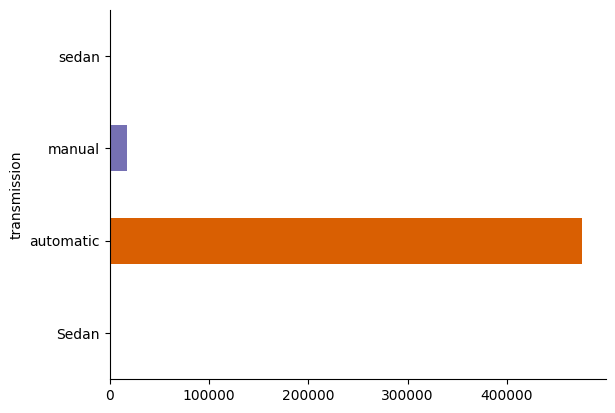

In [ ]:
# @title transmission
raw_df.groupby('transmission').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
raw_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
# vue sur les valeurs manquantes par attribut
raw_df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
#Nombre de valeur unique dans chaque attribut
raw_df.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [ ]:
raw_df['make'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [4]:
# Creating a dictionary with brands and their countries
brand_country_dict = {
    'Kia': 'South Korea', 'BMW': 'Germany', 'Volvo': 'Sweden', 'Nissan': 'Japan', 'Chevrolet': 'USA', 'Audi': 'Germany',
    'Ford': 'USA', 'Hyundai': 'South Korea', 'Buick': 'USA', 'Cadillac': 'USA', 'Acura': 'Japan', 'Lexus': 'Japan',
    'Infiniti': 'Japan', 'Jeep': 'USA', 'Mercedes-Benz': 'Germany', 'Mitsubishi': 'Japan', 'Mazda': 'Japan', 'MINI': 'UK',
    'Land Rover': 'UK', 'Lincoln': 'USA', 'Jaguar': 'UK', 'Volkswagen': 'Germany', 'Toyota': 'Japan', 'Subaru': 'Japan',
    'Scion': 'Japan', 'Porsche': 'Germany', 'Dodge': 'USA', 'FIAT': 'Italy', 'Chrysler': 'USA', 'Ferrari': 'Italy',
    'Honda': 'Japan', 'GMC': 'USA', 'Ram': 'USA', 'smart': 'Germany', 'Bentley': 'UK', 'pontiac': 'USA',
    'Saturn': 'USA', 'Maserati': 'Italy', 'Mercury': 'USA', 'HUMMER': 'USA', 'Isuzu': 'Japan', 'Saab': 'Sweden',
    'Suzuki': 'Japan', 'Oldsmobile': 'USA', 'Geo': 'USA', 'Rolls-Royce': 'UK', 'Tesla': 'USA', 'Aston Martin': 'UK',
    'Daewoo': 'South Korea', 'airstream': 'USA', 'vw': 'Germany', 'mercedes-b': 'Germany','mercedes': 'Germany', 'ford tk': 'USA',
    'hyundai tk': 'South Korea', 'gmc truck': 'USA', 'chev truck': 'USA', 'plymouth': 'USA','porsche': 'Germany', 'mazda tk': 'Japan',
    'bmw' : 'Germany', 'ford': 'USA', 'mitsubishi' : 'Japan', 'chevrolet' : 'USA', 'chrysler' : 'USA', 'Pontiac' : 'USA', 'landrover' : 'UK',
    'cadillac' : 'USA', 'land rover' : 'UK', 'mazda' : 'Japan', 'toyota' : 'Japan', 'lexus' : 'Japan', 'honda' : 'Japan',
    'nissan' : 'South Korea', 'dodge' : 'USA', 'subaru' : 'Japan',  'hyundai' : 'South Korea', 'jeep' : 'UK', 'jaguar' : 'UK', 'kia' : 'South Korea',
     'volkswagen' : 'Germany','suzuki' : 'Japan', 'audi' : 'Japan', 'gmc' : 'USA', 'maserati' : 'Italy' , 'ford truck' : 'USA', 'dodge tk': 'USA'
}



# Map brands to countries
raw_df['Country'] = raw_df['make'].map(lambda x: brand_country_dict.get(x, 'Unknown'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
raw_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate      Country  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  South Korea  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  South Korea  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)      Germany  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)       Sweden  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)      Germany

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


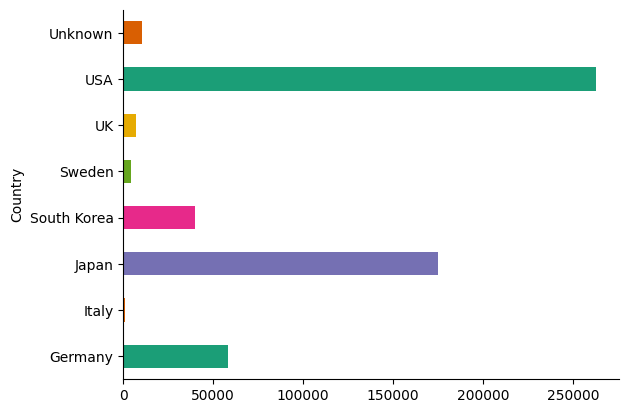

In [5]:
raw_df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
raw_df[raw_df['Country'] == 'Unknown']['make'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['lincoln', nan, 'oldsmobile', 'acura', 'mercury', 'buick',
       'Plymouth', 'dot', 'Fisker', 'Lamborghini', 'Lotus'], dtype=object)

## Data Preprocessing

In [6]:
# Suppression de la colonne Vin = Vehicule in , n'est pas pertinante pour l'etude;
df = raw_df.drop(columns= ['model','vin', 'seller','make','trim','saledate'])
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['year', 'body', 'transmission', 'state', 'condition', 'odometer',
       'color', 'interior', 'mmr', 'sellingprice', 'Country'],
      dtype='object')

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year   body transmission state  condition  odometer  color interior  \
0  2015    SUV    automatic    ca        5.0   16639.0  white    black   
1  2015    SUV    automatic    ca        5.0    9393.0  white    beige   
2  2014  Sedan    automatic    ca       45.0    1331.0   gray    black   
3  2015  Sedan    automatic    ca       41.0   14282.0  white    black   
4  2014  Sedan    automatic    ca       43.0    2641.0   gray    black   

       mmr  sellingprice      Country  
0  20500.0       21500.0  South Korea  
1  20800.0       21500.0  South Korea  
2  31900.0       30000.0      Germany  
3  27500.0       27750.0       Sweden  
4  66000.0       67000.0      Germany

In [7]:
#suppression des lines incompletes (contenant des valeurs manquantes)
df.dropna(inplace=True)
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(472413, 11)

In [ ]:
(raw_df.shape[0] - df.shape[0]) / raw_df.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.21152717808301613

**On remarque que la proportion de lignes incompletes representes 15% du dataset**

dans un cas plus aberrant, il aurait fallu trouver un moyen de garder un maximum de lignes.

In [ ]:
# Nous creons un DataFrame qu'avec des valeurs numerique pour l'utiliser plus tard sur nos models
df_numeric = df.copy()
df_numeric.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(104818, 11)

In [ ]:
df_numeric.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['year', 'body', 'transmission', 'state', 'condition', 'odometer',
       'color', 'interior', 'mmr', 'sellingprice', 'Country'],
      dtype='object')

### Encodage des données catégorielles

In [ ]:
# Colonnes catégorielles
df_categ = ['body', 'transmission', 'state', 'color', 'interior', 'Country']

# Nettoyer les espaces blancs (si nécessaire)
df[df_categ] = df[df_categ].apply(lambda x: x.str.strip())

# Appliquer OneHotEncoder avec un résultat dense
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df[df_categ])

# Convertir en DataFrame et conserver les noms des colonnes encodées
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(df_categ))

# Afficher les premières lignes pour vérifier
df_encoded.head()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


body_Access Cab  body_Beetle Convertible  body_CTS Coupe  body_CTS Wagon  \
0              0.0                      0.0             0.0             0.0   
1              0.0                      0.0             0.0             0.0   
2              0.0                      0.0             0.0             0.0   
3              0.0                      0.0             0.0             0.0   
4              0.0                      0.0             0.0             0.0   

   body_CTS-V Coupe  body_CTS-V Wagon  body_Cab Plus  body_Cab Plus 4  \
0               0.0               0.0            0.0              0.0   
1               0.0               0.0            0.0              0.0   
2               0.0               0.0            0.0              0.0   
3               0.0               0.0            0.0              0.0   
4               0.0               0.0            0.0              0.0   

   body_Club Cab  body_Convertible  ...  interior_yellow  interior_—  \
0            0.0               0.0  ...              0.0         0.0   
1            0.0               0.0  ...              0.0         0.0   
2            0.0               0.0  ...              0.0         0.0   
3            0.0               0.0  ...              0.0         0.0   
4            0.0               0.0  ...              0.0         0.0   

   Country_Germany  Country_Italy  Country_Japan  Country_South Korea  \
0              0.0            0.0            0.0                  1.0   
1              0.0            0.0            0.0                  1.0   
2              1.0            0.0            0.0                  0.0   
3              0.0            0.0            0.0                  0.0   
4              1.0            0.0            0.0                  0.0   

   Country_Sweden  Country_UK  Country_USA  Country_Unknown  
0             0.0         0.0          0.0              0.0  
1             0.0         0.0          0.0              0.0  
2             0.0         0.0          0.0              0.0  
3             1.0         0.0          0.0              0.0  
4             0.0         0.0          0.0              0.0  

[5 rows x 123 columns]

In [ ]:
# Fusionner les colonnes numériques avec les colonnes encodées
df_numeric = df.drop(columns=df_categ)  # Supprimer les colonnes catégorielles
df_numeric = pd.concat([df_numeric.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

# Afficher les premières lignes pour vérifier
print(df_numeric.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   year  condition  odometer    mmr  sellingprice  body_Access Cab  \
0  2015        5.0   16639.0  20500         21500              0.0   
1  2015        5.0    9393.0  20800         21500              0.0   
2  2014       45.0    1331.0  31900         30000              0.0   
3  2015       41.0   14282.0  27500         27750              0.0   
4  2014       43.0    2641.0  66000         67000              0.0   

   body_Beetle Convertible  body_CTS Coupe  body_CTS Wagon  body_CTS-V Coupe  \
0                      0.0             0.0             0.0               0.0   
1                      0.0             0.0             0.0               0.0   
2                      0.0             0.0             0.0               0.0   
3                      0.0             0.0             0.0               0.0   
4                      0.0             0.0             0.0               0.0   

   ...  interior_yellow  interior_—  Country_Germany  Country_Italy  \
0  ...              0.0    

### Détection des anomalies (Vérification de la distribution des variables)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


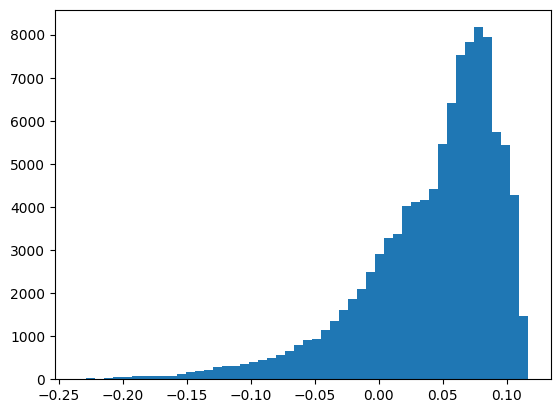

In [ ]:
variables = ['year', 'odometer', 'sellingprice', 'condition', 'mmr']

# Extraire les valeurs des colonnes
X = df_numeric[variables]

# Instancier le modèle IsolationForest
clf = IsolationForest(n_estimators=1000, random_state=0)

# Entraîner le modèle sur les données
clf.fit(X)

# Calculer les scores d'anomalie
score = clf.decision_function(X)

# Afficher l'histogramme des scores
plt.hist(score, bins=50)
plt.show()

In [ ]:
threshold = -0.235

# Associe les scores d'anomalie au DataFrame d'origine (df_numeric dans ce cas)
df_numeric['anomaly_score'] = score

# On crée une nouvelle colonne 'outliers_adjusted' pour marquer les outliers
df_numeric['outliers_adjusted'] = (df_numeric['anomaly_score'] < threshold).astype(int)

# Affiche le compte des outliers détectés
print(df_numeric['outliers_adjusted'].value_counts())

outliers_adjusted
0    104817
1         1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


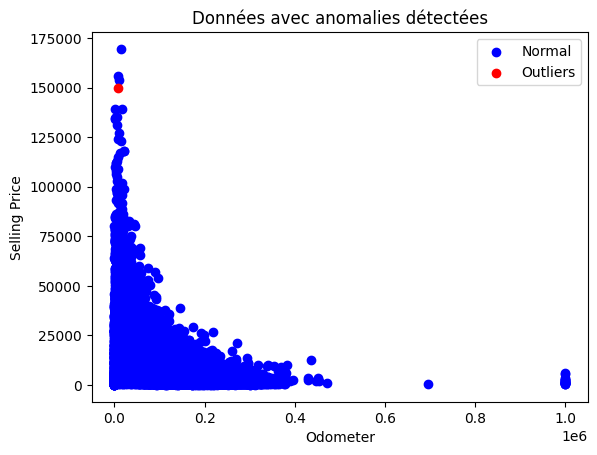

In [ ]:
# Scatter plot des points normaux
plt.scatter(df_numeric['odometer'][df_numeric['outliers_adjusted'] == 0],
            df_numeric['sellingprice'][df_numeric['outliers_adjusted'] == 0],
            c='blue', label='Normal')

# Scatter plot des outliers
plt.scatter(df_numeric['odometer'][df_numeric['outliers_adjusted'] == 1],
            df_numeric['sellingprice'][df_numeric['outliers_adjusted'] == 1],
            c='red', label='Outliers')

plt.title('Données avec anomalies détectées')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

On remarque après l'application de 'Isolation Forest' qu'il n'y a pas d'anomalies signifatives (outliers), on considère donc que notre jeu de données n'en contient pas.


###  Normalisation des données :

In [ ]:
# Puisqu'on va appliquer un clustering il est interressant de scaler les donnees numeriques car kmeans est sensible au valeur aberrantes
def Scaler(df):
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            scaler = StandardScaler()
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
df_Scaled = df_numeric.copy()
Scaler(df_Scaled)
df_Scaled.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year  condition  odometer       mmr  sellingprice  body_Access Cab  \
0  1.299089  -1.825440 -0.960007  0.764174      0.891432         -0.02312   
1  1.299089  -1.825440 -1.093381  0.796182      0.891432         -0.02312   
2  1.045510   1.105418 -1.241775  1.980504      1.790203         -0.02312   
3  1.299089   0.812332 -1.003391  1.511043      1.552293         -0.02312   
4  1.045510   0.958875 -1.217662  5.618827      5.702502         -0.02312   

   body_Beetle Convertible  body_CTS Coupe  body_CTS Wagon  body_CTS-V Coupe  \
0                  -0.0107       -0.014815       -0.006178         -0.009267   
1                  -0.0107       -0.014815       -0.006178         -0.009267   
2                  -0.0107       -0.014815       -0.006178         -0.009267   
3                  -0.0107       -0.014815       -0.006178         -0.009267   
4                  -0.0107       -0.014815       -0.006178         -0.009267   

   ...  Country_Germany  Country_Italy  Country_Japan  Country_South Korea  \
0  ...         -0.34616      -0.041591      -0.689339             3.485200   
1  ...         -0.34616      -0.041591      -0.689339             3.485200   
2  ...          2.88884      -0.041591      -0.689339            -0.286928   
3  ...         -0.34616      -0.041591      -0.689339            -0.286928   
4  ...          2.88884      -0.041591      -0.689339            -0.286928   

   Country_Sweden  Country_UK  Country_USA  Country_Unknown  anomaly_score  \
0       -0.090687   -0.110172    -0.947184        -0.006178      -1.198834   
1       -0.090687   -0.110172    -0.947184        -0.006178      -1.372901   
2       -0.090687   -0.110172    -0.947184        -0.006178      -1.232917   
3       11.026974   -0.110172    -0.947184        -0.006178      -0.823537   
4       -0.090687   -0.110172    -0.947184        -0.006178      -4.291334   

   outliers_adjusted  
0          -0.003089  
1          -0.003089  
2          -0.003089  
3          -0.003089  
4          -0.003089  

[5 rows x 130 columns]

In [ ]:
print(df_Scaled.dtypes)


year                 float64
condition            float64
odometer             float64
mmr                  float64
sellingprice         float64
                      ...   
Country_UK           float64
Country_USA          float64
Country_Unknown      float64
anomaly_score        float64
outliers_adjusted    float64
Length: 130, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Matrice de corrélation :

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


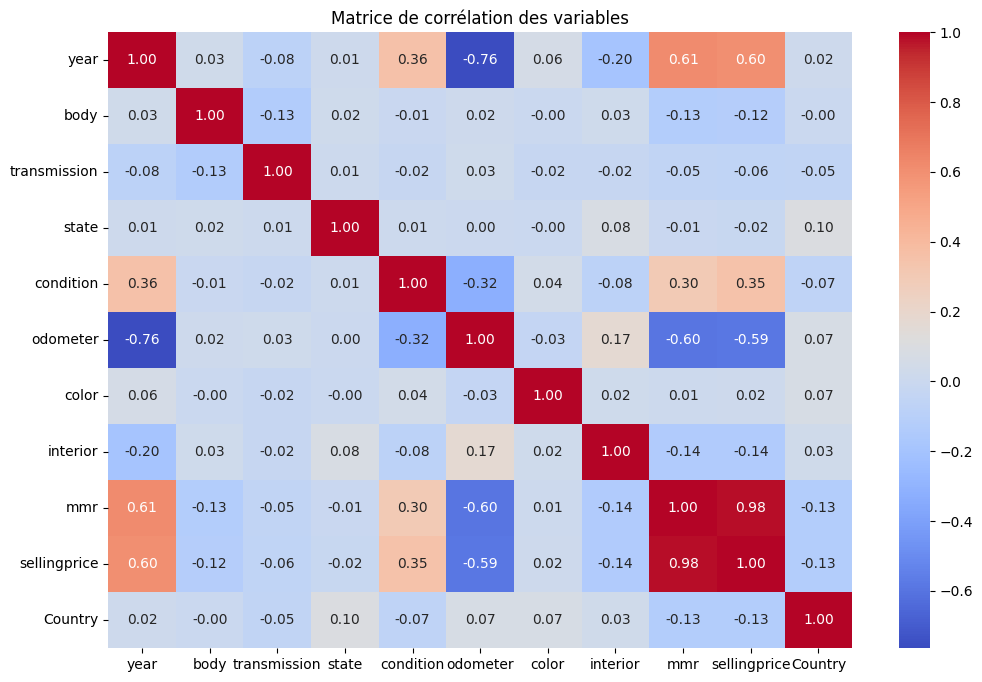

In [ ]:
# 1. Encoder les colonnes catégorielles avec LabelEncoder
def Encode_Label(df):
    labelencoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':  # Vérifie si la colonne est de type 'object'
            df[col] = labelencoder.fit_transform(df[col])
    return df

# Encoder les colonnes catégorielles avec labelEncoder
df_encoded = df.copy()
df_encoded = Encode_Label(df_encoded)

#Scaler les colonnes numériques
def Scaler(df):
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':  # Vérifie les colonnes numériques
            scaler = StandardScaler()
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    return df

df_Scaled = df_encoded.copy()  # Copie du dataframe encodé avec labelencoder
df_Scaled = Scaler(df_Scaled)

# Calculer la matrice de corrélation
corr_matrix = df_Scaled.corr()

# Afficher la heatmap avec les annotations (valeurs numériques)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables')
plt.show()



### Clustering :

#### Application de PCA :

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


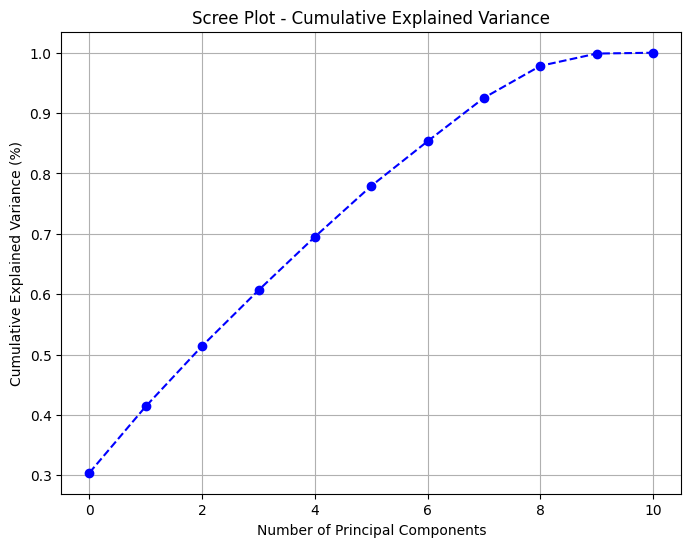

In [ ]:
# Appliquer PCA sans limiter le nombre de composantes pour tout capturer (LA CEST LES RESULTATS AVEC LABELENCODER)
pca = PCA().fit(df_Scaled)

# Calculer la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Tracer le scree plot
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


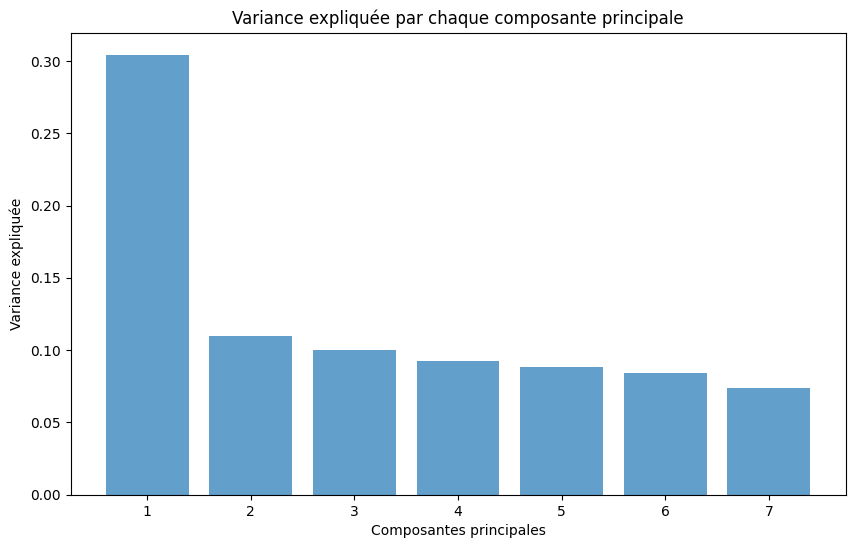

In [ ]:
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_treated)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [ ]:
loadings = pd.DataFrame(pca.components_, columns=df_Scaled.columns)
print(loadings)

       year      body  transmission     state  condition  odometer     color  \
0  0.456372 -0.048596     -0.041159 -0.010490   0.274976 -0.449270  0.025790   
1 -0.182064 -0.494852      0.501802 -0.328867  -0.075838  0.078637 -0.298777   
2  0.003242  0.527916     -0.408225 -0.507732   0.004219 -0.006162 -0.257943   
3  0.052959 -0.158904      0.030149 -0.522120  -0.018168 -0.012952  0.648480   
4 -0.133996 -0.109539     -0.181213 -0.228979   0.072804  0.089445  0.467117   
5  0.058903  0.444968      0.556672  0.230922   0.361338 -0.083877  0.319299   
6 -0.128481 -0.186914     -0.371704  0.504585  -0.233754  0.115627  0.290665   

   interior       mmr  sellingprice   Country  
0 -0.140557  0.491147      0.493093 -0.072906  
1 -0.187308  0.082623      0.080355 -0.460918  
2 -0.233955 -0.061287     -0.056673 -0.410563  
3 -0.428040 -0.098633     -0.091857  0.275715  
4  0.682330  0.117281      0.128715 -0.396713  
5 -0.089045 -0.176178     -0.157526 -0.363306  
6 -0.449876  0.059513  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Résumé des composantes et de leurs interprétations
**1ère composante :** Valeur économique du véhicule (prix de vente et valeur de marché).

**2ème composante :** Caractéristiques géographiques et d’usage (pays de vente et distance parcourue).

**3ème composante :** Spécifications physiques et techniques (carrosserie et transmission).

**4ème composante :** Design intérieur (couleur intérieure).

**5ème composante :** Condition générale du véhicule.

#### Trouver le nombre de clusters en utilisant le score silhouette :

In [ ]:
# Liste pour stocker les scores silhouette
#silhouette_avg = []

# Essayer différents nombres de clusters
#for i in range(2, 300, 10):
    #kmeans = KMeans(n_clusters=i, random_state=42)
    #kmeans.fit(df_pca)
    #labels = kmeans.labels_
    #silhouette_avg.append(silhouette_score(df_pca, labels))  # Calculer le score silhouette
    #print("Pour n_clusters =", i, "Le score silhouette moyen est :", silhouette_avg[-1])

# Tracer le score silhouette
#plt.figure(figsize=(10, 6))
#plt.plot(range(2, 300, 10), silhouette_avg, marker='o')
#plt.title('Score Silhouette en fonction du nombre de clusters (après PCA)')
#plt.xlabel('Nombre de clusters')
#plt.ylabel('Score Silhouette')
#plt.grid()
#plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Application de K-MEANS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


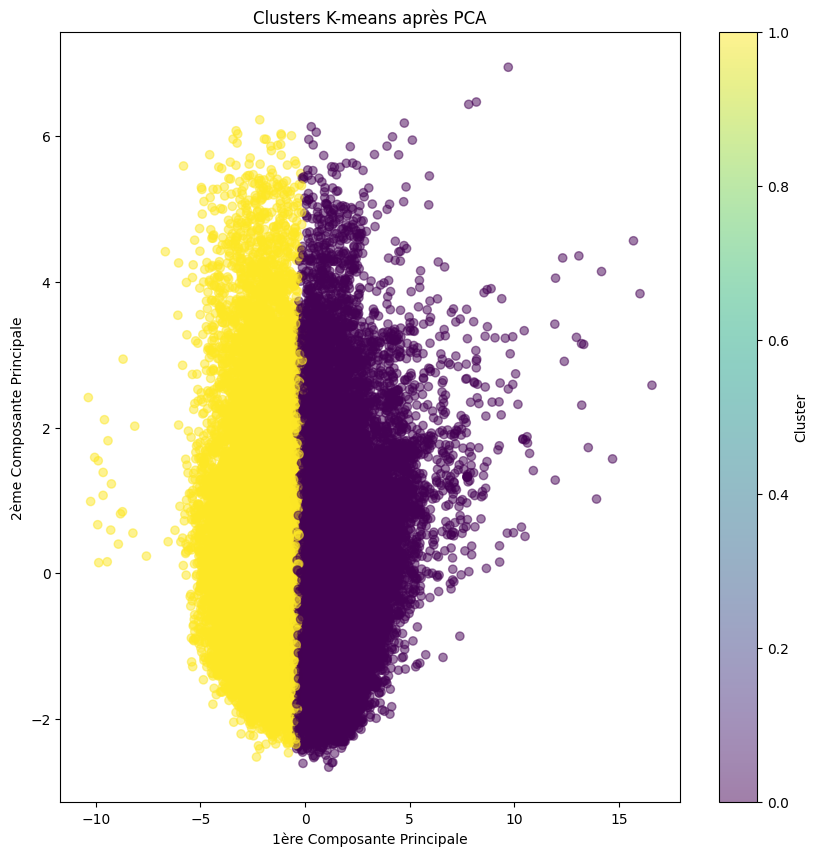

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_pca)
plt.figure(figsize=(10, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Clusters K-means après PCA')
plt.xlabel('1ère Composante Principale')
plt.ylabel('2ème Composante Principale')
plt.colorbar(label='Cluster')
plt.show()

#### Application de DBSCAN :

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


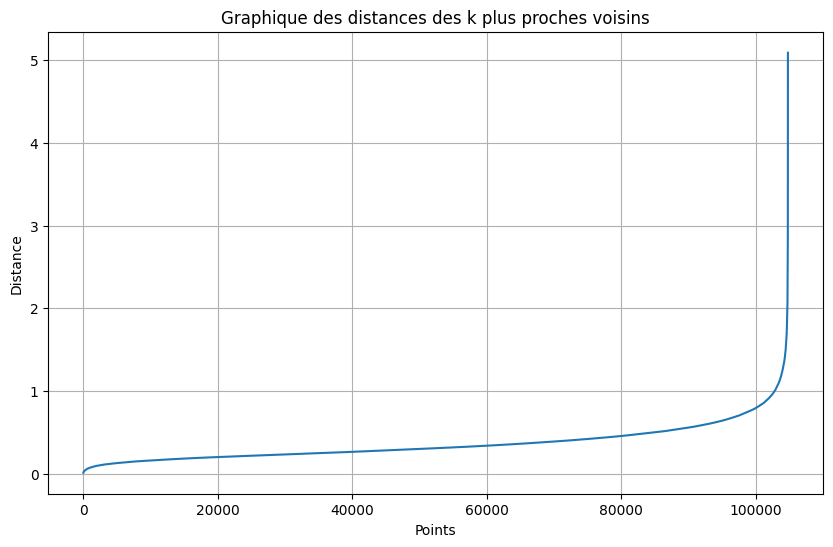

In [ ]:
# Calcul des distances
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)
distances = np.sort(distances[:,4], axis=0)  # Utilise la 5ème distance

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Graphique des distances des k plus proches voisins')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


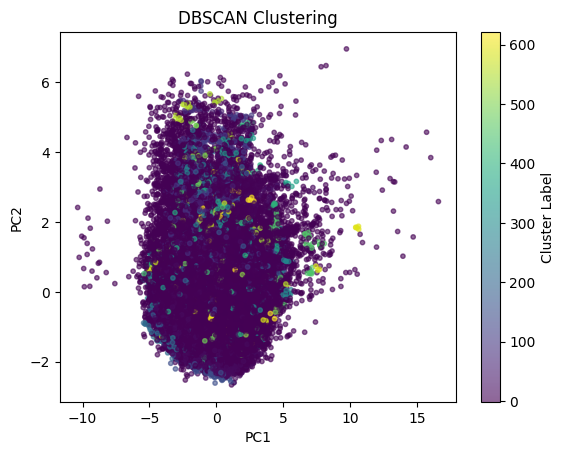

In [ ]:

# Appliquer DBSCAN directement sur les données transformées par PCA
dbscan = DBSCAN(eps=0.5, min_samples=4)
labels = dbscan.fit_predict(df_pca)

# Visualiser les résultats des clusters DBSCAN (projection des deux premières composantes principales)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Z = linkage(df_Scaled, method='ward')  # 'ward' peut être remplacé par 'single', 'complete', ou 'average'

# Visualisation du dendrogramme
#plt.figure(figsize=(12, 8))
#dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
#plt.title('Dendrogram for Hierarchical Clustering')
#plt.xlabel('Cluster Size')
#plt.ylabel('Distance')
#plt.show()

# Découper le dendrogramme pour former des clusters
#num_clusters = 4  # Ajuster selon l'observation du dendrogramme
#cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# Ajouter les étiquettes de cluster à un DataFrame pour analyse
#clustered_data = pd.DataFrame(data_scaled, columns=['Feature1', 'Feature2', '...'])  # Remplace par tes colonnes
#clustered_data['Cluster'] = cluster_labels

# Analyse des clusters
#print(clustered_data.groupby('Cluster').mean())  # Moyenne par cluster


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


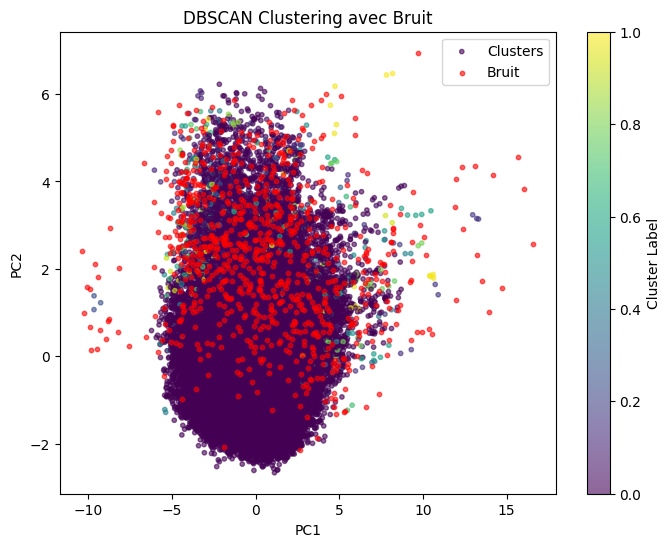

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN directement sur les données transformées par PCA
dbscan = DBSCAN(eps=0.9, min_samples=2)
labels = dbscan.fit_predict(df_pca)

# Visualiser les résultats des clusters DBSCAN (projection des deux premières composantes principales)
plt.figure(figsize=(8, 6))

# Points appartenant à un cluster
plt.scatter(df_pca[labels != -1, 0], df_pca[labels != -1, 1], c=labels[labels != -1], cmap='viridis', s=10, alpha=0.6, label='Clusters')

# Points du bruit (label -1)
plt.scatter(df_pca[labels == -1, 0], df_pca[labels == -1, 1], color='red', s=10, alpha=0.6, label='Bruit')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering avec Bruit')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


In [ ]:
# Trouver les meilleurs paramètres
#eps_values = np.arange(0.1, 2.1, 0.1)
#min_samples_values = range(1, 10)

# Dictionnaire pour stocker les résultats
#results = {}

# Boucle à travers les valeurs d'eps et min_samples
#for eps in eps_values:
   # for min_samples in min_samples_values:
   #    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
   #    clusters = dbscan.fit_predict(df_pca)

        # Compte le nombre de points dans chaque cluster
        #cluster_counts = np.bincount(clusters + 1)  # +1 pour ignorer -1 (bruit)

        # Enregistrer les résultats
        #results[(eps, min_samples)] = {
            #'num_clusters': len(cluster_counts) - 1,  # Ne pas compter le bruit
            #'num_noise': cluster_counts[0],  # Nombre de points bruit
            #'cluster_distribution': cluster_counts[1:],  # Distribution des clusters
        #}

# Afficher les résultats
#for key, value in results.items():
    #eps, min_samples = key
    #print(f"eps: {eps}, min_samples: {min_samples} -> Clusters: {value['num_clusters']}, Noise: {value['num_noise']}")
    #print(f"Cluster Distribution: {value['cluster_distribution']}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### GaussianMixture

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


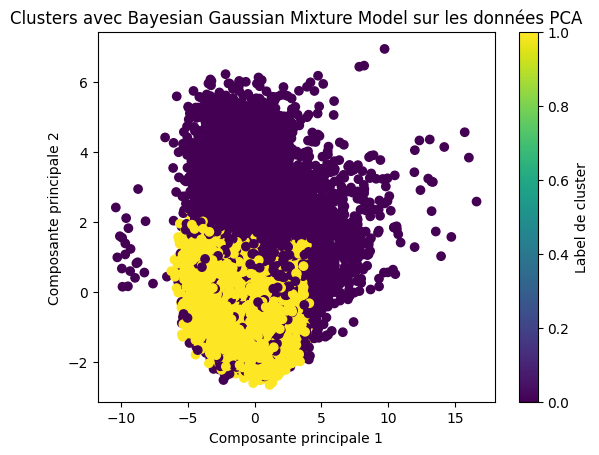

In [ ]:
# Application de Bayesian Gaussian Mixture
bgm = BayesianGaussianMixture(n_components=2, covariance_type='full', random_state=42)
bgm.fit(df_pca)
labels = bgm.predict(df_pca)
proba = bgm.predict_proba(df_pca)

# Affichage des clusters en utilisant les deux premières composantes principales
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Clusters avec Bayesian Gaussian Mixture Model sur les données PCA")
plt.colorbar(label='Label de cluster')
plt.show()

In [ ]:
np.unique(labels).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [ ]:
# regroupement des data frames
df_Pca = pd.DataFrame(df_pca, columns=[f'Axe {i+1}' for i in range(df_pca.shape[1])])
df_treated = pd.concat([df_Scaled, df_encoded,df_Pca], axis=1)
df_treated.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['year', 'body', 'transmission', 'state', 'condition', 'odometer',
       'color', 'interior', 'mmr', 'sellingprice',
       ...
       'Country_UK', 'Country_USA', 'Country_Unknown', 'Axe 1', 'Axe 2',
       'Axe 3', 'Axe 4', 'Axe 5', 'Axe 6', 'Axe 7'],
      dtype='object', length=104)

In [ ]:
df_treated = df_treated.dropna()
df_treated.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(80098, 104)

In [ ]:


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(df_treated)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


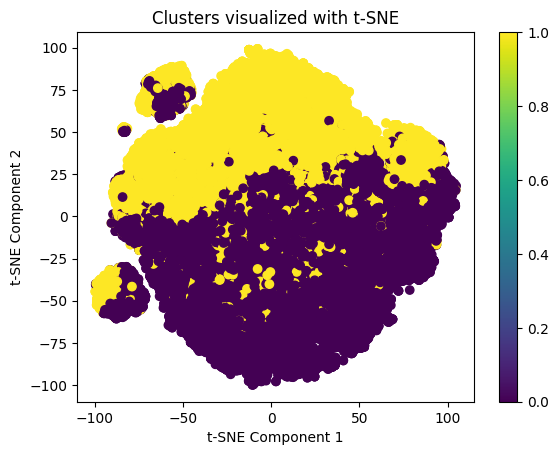

In [ ]:

plt.scatter(data_tsne[:, 0], data_tsne[:, 1],c=kmeans.labels_[:80098], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters visualized with t-SNE')
plt.colorbar()
plt.show()

Approche avec methode Som

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


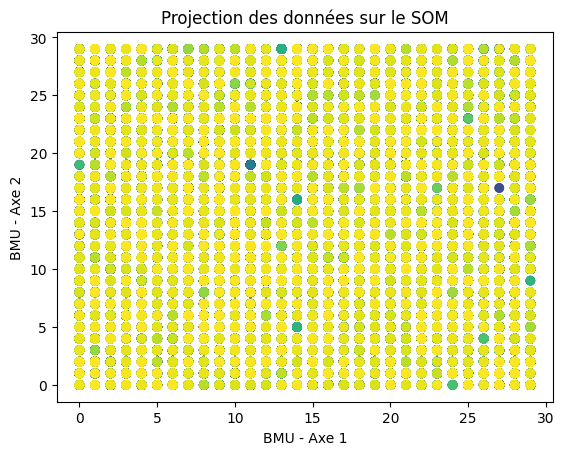

In [ ]:
# Convert all columns to numeric where possible. If a column can't be converted, it will be filled with NaNs.
# Then replace NaNs with 0. You might want to consider a more sophisticated imputation strategy depending on your data.
# Convert all string to categorical and then to numeric
for col in df_treated.select_dtypes(include=['object']).columns:
    df_treated[col] = pd.Categorical(df_treated[col]).codes

df_numeric = df_treated.apply(pd.to_numeric, errors='coerce').fillna(0)

array_np = df_numeric.to_numpy()
# Initialisation du SOM (taille de la grille et paramètres)
som = MiniSom(x=30, y=30, input_len=array_np.shape[1], sigma=0.5, learning_rate=0.5)
# Initialisation aléatoire des poids
som.random_weights_init(array_np)

# Entraînement du SOM
som.train_random(array_np, num_iteration=100)

# Obtenir les clusters en identifiant la BMU (Best Matching Unit)
bmu = np.array([som.winner(x) for x in array_np])

# Visualisation des clusters
plt.scatter(bmu[:, 0], bmu[:, 1], c=np.arange(len(bmu)), cmap='viridis')
plt.xlabel('BMU - Axe 1')
plt.ylabel('BMU - Axe 2')
plt.title("Projection des données sur le SOM")
plt.show()

## Predicion de vente

Comparaison entre plusieurs models de regression


In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Régression Linéaire": LinearRegression(),
        "Forêt Aléatoire": RandomForestRegressor(n_estimators=100, random_state=42),
        "Support Vector Regression": SVR(),
        "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
        "MlpRegressor": MLPRegressor(hidden_layer_sizes=(80, 80), activation='relu', solver='adam', max_iter=1000, random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Entraîner le modèle
        model.fit(X_train, y_train)

        # Faire des prédictions
        y_pred = model.predict(X_test)

        # Calculer les métriques
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MSE": mse, "R²": r2}

    return results


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from re import X
X = df_numeric.drop(columns=['sellingprice'])
y = df_numeric['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = evaluate_models(X_train, X_test, y_train, y_test)

# Afficher les résultats
for model, metrics in results.items():
    print(f"Modèle: {model}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}")
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Modèle: Régression Linéaire
  MSE: 2738795.722296031
  R²: 0.9697489454380173

Modèle: Forêt Aléatoire
  MSE: 1932366.2598863528
  R²: 0.9786562697299123

Modèle: Support Vector Regression
  MSE: 56770036.6591014
  R²: 0.37295306017912233

Modèle: XGBoost
  MSE: 2566832.663399147
  R²: 0.9716483354568481

Modèle: MlpRegressor
  MSE: 2809726.5952191274
  R²: 0.9689654866026403



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


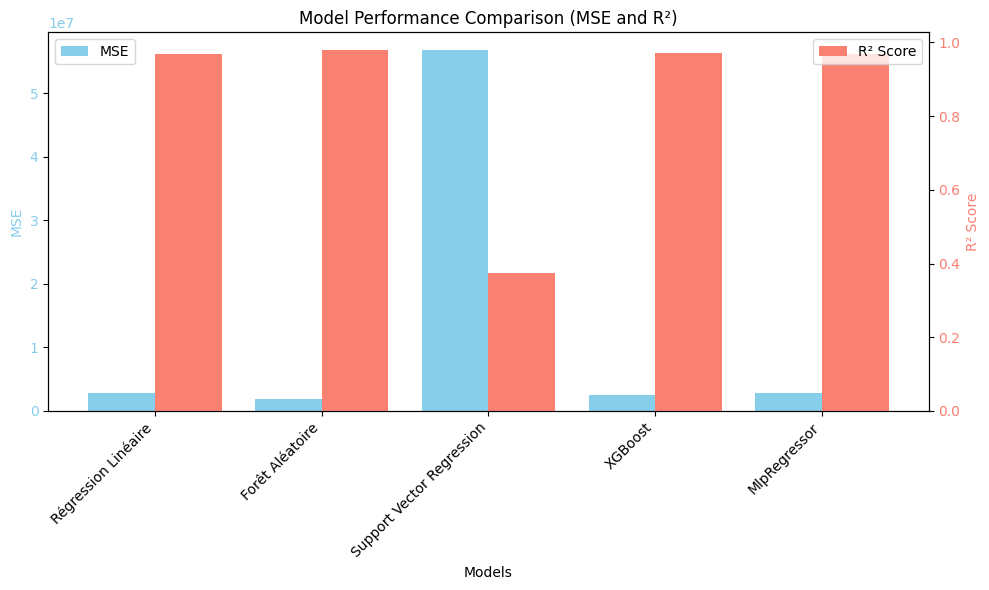

In [ ]:
def plot_model_performance(results):
    models = list(results.keys())
    mse_scores = [results[model]['MSE'] for model in models]
    r2_scores = [results[model]['R²'] for model in models]

    x = np.arange(len(models))  # The label locations

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot MSE values
    bars1 = ax1.bar(x - 0.2, mse_scores, width=0.4, color='skyblue', label='MSE')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('MSE', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha="right")

    # Create a secondary y-axis to plot the R² values
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + 0.2, r2_scores, width=0.4, color='salmon', label='R² Score')
    ax2.set_ylabel('R² Score', color='salmon')
    ax2.tick_params(axis='y', labelcolor='salmon')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Model Performance Comparison (MSE and R²)')
    plt.tight_layout()
    plt.show()

# Assuming the 'results' variable contains MSE and R² values from the previous code
plot_model_performance(results)

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(80, 80), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model on the training set
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (MSE): 2809726.5952191274
R² Score: 0.9689654866026403


# Recommandation


## Recommander des véhicules selon la popularité dans une région spécifique :

- Question : "Quels types de véhicules sont les plus vendus dans une région donnée ?"
Avec les informations sur l'état (région) et le vendeur, vous pouvez recommander des véhicules populaires dans des régions spécifiques ou auprès de certains types de vendeurs.

In [ ]:
# Liste des colonnes à supprimer
columns_to_drop = ['vin', 'color', 'interior', 'seller', 'mmr']

# Suppression des colonnes non pertinentes
df = raw_df.drop(columns=columns_to_drop)

# Afficher les premières lignes du DataFrame après suppression
print(df.head())


   year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  sellingprice                                 saledate  \
0        5.0   16639.0         21500  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)   
1        5.0    9393.0         21500  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)   
2       45.0    1331.0         30000  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)   
3       41.0   14282.0         27750  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)   
4       43.0    2641.0         67000  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)   

       Country  
0  South Korea  
1  South Korea  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#suppression des lines incompletes (contenant des valeurs manquantes)
df.dropna(inplace=True)
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(104921, 12)

In [ ]:

# Liste des colonnes catégorielles et numériques
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state']
numerical_cols = ['odometer', 'condition', 'sellingprice']

# Création de l'encodeur pour les variables catégorielles
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Création du scaler pour les variables numériques
numerical_transformer = RobustScaler()

# Création d'un ColumnTransformer pour appliquer les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ]
)

# Application des transformations avec un Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Application du pipeline sur les données (fit_transform)
processed_data = pipeline.fit_transform(df)

# Transformation en DataFrame pour plus de lisibilité
# Récupération des noms des colonnes encodées
encoded_cat_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(encoded_cat_cols) + numerical_cols

# Conversion des données transformées en DataFrame
processed_df = pd.DataFrame(processed_data, columns=all_columns)

# Affichage des premières lignes du DataFrame transformé
print(processed_df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   make_Aston Martin  make_Audi  make_BMW  make_Bentley  make_Buick  \
0                0.0        0.0       0.0           0.0         0.0   
1                0.0        0.0       0.0           0.0         0.0   
2                0.0        0.0       1.0           0.0         0.0   
3                0.0        0.0       0.0           0.0         0.0   
4                0.0        0.0       1.0           0.0         0.0   

   make_Cadillac  make_Chevrolet  make_Chrysler  make_Dodge  make_FIAT  ...  \
0            0.0             0.0            0.0         0.0        0.0  ...   
1            0.0             0.0            0.0         0.0        0.0  ...   
2            0.0             0.0            0.0         0.0        0.0  ...   
3            0.0             0.0            0.0         0.0        0.0  ...   
4            0.0             0.0            0.0         0.0        0.0  ...   

   state_sc  state_tn  state_tx  state_ut  state_va  state_wa  state_wi  \
0       0.0       0.0  

In [ ]:


# Construire une colonne unique pour représenter les véhicules par make et model
df['vehicle'] = df['make'] + ' ' + df['model']

# Créer la matrice région-véhicule (pivot table)
region_vehicle_matrix = df.pivot_table(index='state', columns='vehicle', values='sellingprice', aggfunc='count', fill_value=0)

# Vérifier la forme de la matrice
print(region_vehicle_matrix.shape)

# Convertir en matrice sparse (pour efficacité)
region_vehicle_sparse = csr_matrix(region_vehicle_matrix)


(33, 692)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


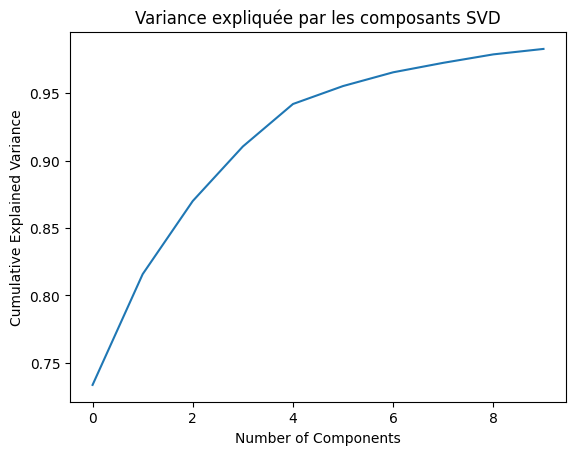

In [ ]:
# Utilisation de la décomposition SVD pour factoriser la matrice
svd = TruncatedSVD(n_components=10)  # Choisir un nombre de composants
region_vehicle_svd = svd.fit_transform(region_vehicle_sparse)

# Visualiser la variance expliquée par les composants
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance expliquée par les composants SVD')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


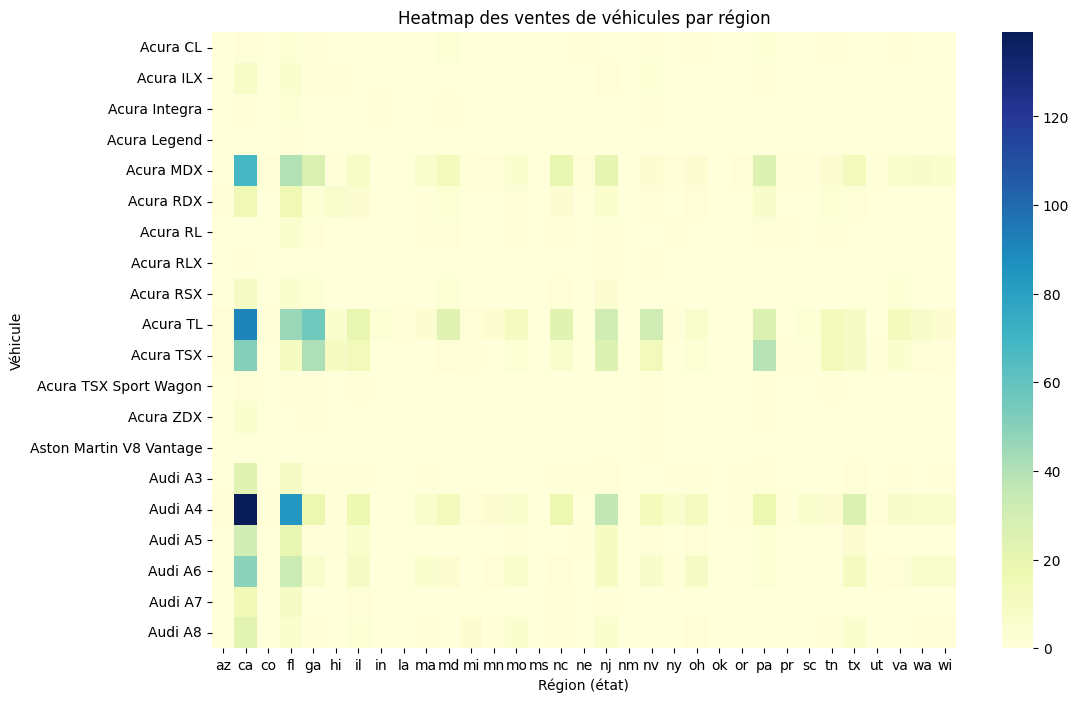

In [ ]:
# Heatmap pour visualiser les ventes par région pour les véhicules les plus populaires
plt.figure(figsize=(12, 8))
sns.heatmap(region_vehicle_matrix.T.iloc[:20], cmap='YlGnBu', annot=False)  # Affiche les 20 premiers véhicules
plt.title('Heatmap des ventes de véhicules par région')
plt.xlabel('Région (état)')
plt.ylabel('Véhicule')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


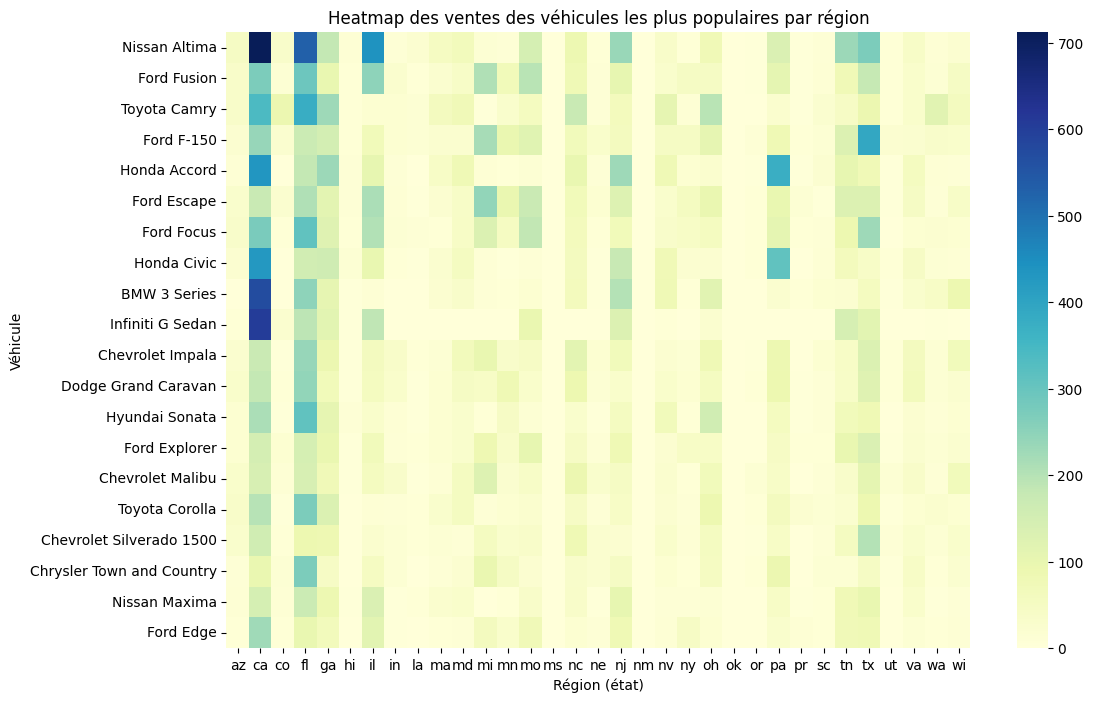

In [ ]:
# Calculer le nombre total de ventes pour chaque véhicule (somme des ventes par région)
vehicle_popularity = region_vehicle_matrix.sum(axis=0).sort_values(ascending=False)

# Sélectionner les 20 véhicules les plus vendus
top_vehicles = vehicle_popularity.head(20).index

# Filtrer la matrice pour ces véhicules
top_vehicle_matrix = region_vehicle_matrix[top_vehicles]

# Afficher la heatmap des véhicules les plus populaires par région
plt.figure(figsize=(12, 8))
sns.heatmap(top_vehicle_matrix.T, cmap='YlGnBu', annot=False)
plt.title('Heatmap des ventes des véhicules les plus populaires par région')
plt.xlabel('Région (état)')
plt.ylabel('Véhicule')
plt.show()


In [ ]:
# Obtenir les termes les plus importants par région (données factorisées)
def get_top_vehicles(region_index, region_vehicle_matrix, n=15):
    region_data = region_vehicle_matrix.iloc[region_index]
    sorted_vehicles = region_data.sort_values(ascending=False)
    return sorted_vehicles.head(n)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top véhicules en Californie :
vehicle
Nissan Altima            712
Infiniti G Sedan         605
BMW 3 Series             571
Honda Accord             433
Honda Civic              427
Toyota Camry             340
BMW 5 Series             307
Ford Focus               273
Ford Fusion              271
Ford Mustang             267
Volkswagen Jetta         266
Mercedes-Benz E-Class    244
Mercedes-Benz C-Class    240
Ford F-150               237
Ford Edge                227
Name: ca, dtype: int64


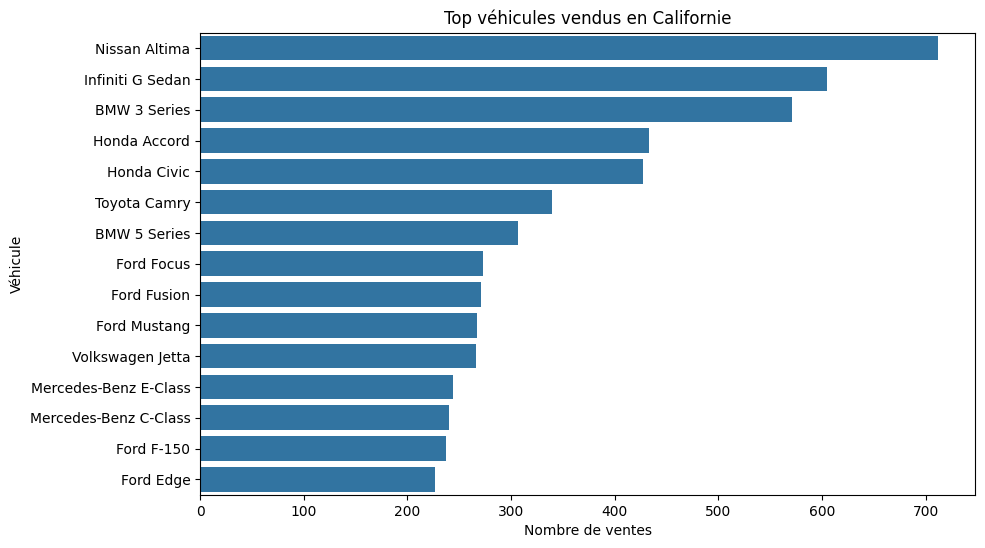

In [ ]:


# Exemple : Quels sont les véhicules les plus populaires en Californie ?
california_index= region_vehicle_matrix.index.get_loc('ca')  # Index de la floride dans la matrice
top_vehicles_california = get_top_vehicles(california_index, region_vehicle_matrix)

# Afficher les résultats
print("Top véhicules en Californie :")
print(top_vehicles_california)

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_vehicles_california.values, y=top_vehicles_california.index)
plt.title('Top véhicules vendus en Californie')
plt.xlabel('Nombre de ventes')
plt.ylabel('Véhicule')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top véhicules en Floride :
vehicle
Nissan Altima                531
Toyota Camry                 376
Ford Focus                   311
Hyundai Sonata               309
Ford Fusion                  294
Toyota Corolla               271
Chrysler Town and Country    270
BMW 3 Series                 249
Dodge Grand Caravan          244
Chevrolet Impala             238
Ford Escape                  208
Lexus ES 350                 196
Infiniti G Sedan             190
Hyundai Elantra              188
Dodge Charger                183
Name: fl, dtype: int64


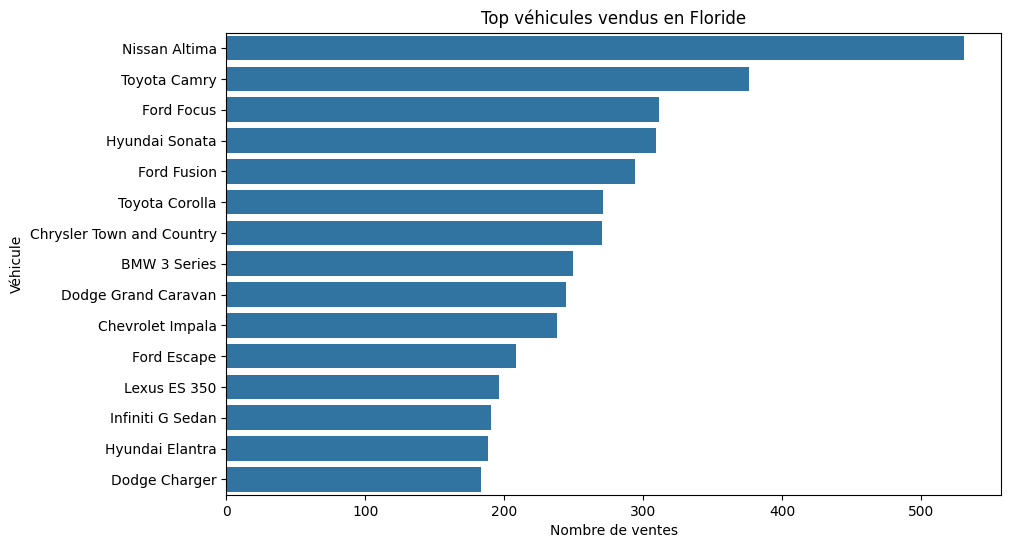

In [ ]:
# Exemple : Quels sont les véhicules les plus populaires en Floride ?
florida_index = region_vehicle_matrix.index.get_loc('fl')
top_vehicles_florida = get_top_vehicles(florida_index, region_vehicle_matrix)

# Afficher les résultats
print("Top véhicules en Floride :")
print(top_vehicles_florida)

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_vehicles_florida.values, y=top_vehicles_florida.index)
plt.title('Top véhicules vendus en Floride')
plt.xlabel('Nombre de ventes')
plt.ylabel('Véhicule')
plt.show()


# Patterns Fréquents

In [8]:
# Colonnes catégorielles
df_categ = ['body', 'transmission', 'state',  'Country']

# Nettoyer les espaces blancs (si nécessaire)
df[df_categ] = df[df_categ].apply(lambda x: x.str.strip())

# Appliquer OneHotEncoder avec un résultat dense
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df[df_categ])

# Convertir en DataFrame et conserver les noms des colonnes encodées
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(df_categ))

# Convertir les données encodées en booléen
df_encoded = df_encoded.astype(bool)

# Fusionner les données numériques avec les données encodées
df_numeric = df.drop(columns=df_categ)  # Supprimer les colonnes catégorielles

# Réinitialiser les index pour les deux DataFrames afin de les aligner
df_encoded.reset_index(drop=True, inplace=True)
df_numeric.reset_index(drop=True, inplace=True)

# Ajouter le prix de vente après avoir fait l'encodage et l'analyse de motifs fréquents
df_numeric['sellingprice'] = df['sellingprice']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    472413.000000
mean      13700.325685
std        9640.913684
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64


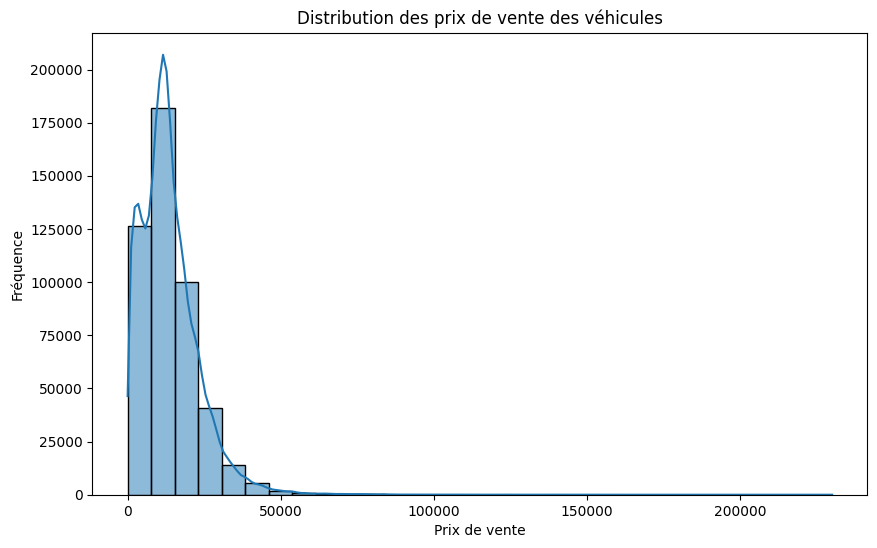

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives pour la colonne 'sellingprice'
print(df['sellingprice'].describe())

# Visualisation de la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], kde=True, bins=30)
plt.title('Distribution des prix de vente des véhicules')
plt.xlabel('Prix de vente')
plt.ylabel('Fréquence')
plt.show()


In [10]:
seuil_prix_eleve = df['sellingprice'].quantile(0.9)
print(f"Seuil pour les prix élevés : {seuil_prix_eleve}")


Seuil pour les prix élevés : 25400.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

# Appliquer un seuil sur les prix pour sélectionner uniquement les véhicules chers
seuil_prix_eleve = 25400
df_haut_prix = df_encoded[df_numeric['sellingprice'] > seuil_prix_eleve]

# Appliquer l'algorithme Apriori sur les données encodées
motifs_frequents = apriori(df_haut_prix, min_support=0.1, use_colnames=True)

# Afficher les motifs fréquents
print(motifs_frequents)

# Optionnel : extraire des règles d'association
# Get the number of frequent itemsets
num_itemsets = len(motifs_frequents)

# Pass num_itemsets to association_rules
regles = association_rules(motifs_frequents, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)
print(regles)

     support                                           itemsets
0   0.201256                                         (body_SUV)
1   0.358540                                       (body_Sedan)
2   0.967391                           (transmission_automatic)
3   0.148283                                         (state_ca)
4   0.160008                                         (state_fl)
5   0.106101                                  (Country_Germany)
6   0.316852                                    (Country_Japan)
7   0.484227                                      (Country_USA)
8   0.198532                 (body_SUV, transmission_automatic)
9   0.118839                            (Country_USA, body_SUV)
10  0.350187               (body_Sedan, transmission_automatic)
11  0.132277                        (body_Sedan, Country_Japan)
12  0.136894                          (body_Sedan, Country_USA)
13  0.143250                 (state_ca, transmission_automatic)
14  0.155105                 (state_fl, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
